# Problem 1


## a)

In [1]:
import numpy as np

# Define Matrix A
A = np.array([[8,17,35,98],
              [17,35,98,282],
              [35,98,282,996],
              [98,282,996,2778]], float)

A

array([[   8.,   17.,   35.,   98.],
       [  17.,   35.,   98.,  282.],
       [  35.,   98.,  282.,  996.],
       [  98.,  282.,  996., 2778.]])

In [2]:
# Define vector b
b = np.array([13.3,25.56,67.89,203.42], float)

b

array([ 13.3 ,  25.56,  67.89, 203.42])

In [3]:
# Solution Using Numpy Library for Verification
np.linalg.solve(A, b)

array([-0.18504801,  0.98813711,  0.02661394, -0.03009627])

In [4]:
# Initial estimate vector x0 is vector 1

x0 = np.array([1,1,1,1], float)
x0

array([1., 1., 1., 1.])

In [5]:
# Define maximum iteration variable
itr_max = 50

# Define tolerance
tol = 1e-4

In [6]:
# Set the initial search direction
r0 = np.dot(A,x0) - b
d0 = -r0
d0

array([ -144.7 ,  -406.44, -1343.11, -3950.58])

In [7]:
delta0 = np.dot(r0.T,r0)
delta0

17597158.3721

In [8]:
r = []
r.append(r0)

d = []
d.append(d0)

delta = []
delta.append(delta0) 

# lambda_m
step_size = []

x = []
x.append(x0) 

alpha = []

r,d,delta,step_size,alpha,x

([array([ 144.7 ,  406.44, 1343.11, 3950.58])],
 [array([ -144.7 ,  -406.44, -1343.11, -3950.58])],
 [17597158.3721],
 [],
 [],
 [array([1., 1., 1., 1.])])

### Code to iteratively solve Ax = b for x, with the Conjugate Gradient method

In [9]:
norm = [] # Initialize list to store error norm values

for m in range(0, itr_max+1): # Start the iteration loop
    print(f'Iteration # {m+1}')
    u = np.dot(A,d[m])
    
    lambda_m = delta[m] / np.dot(d[m],u)
    #lambda_m = delta[m] / d[m].T*u
    step_size.append(lambda_m)
    
    x_new = x[m] + lambda_m * d[m]
    print(x_new)
    x.append(x_new)
    
    r_new = r[m] + np.dot(lambda_m, u)
    #r_new = r[m] + lambda_m*u
    r.append(r_new)
    
    delta_new = np.dot(r_new,r_new)
    #delta_new = r_new.T*r_new
    delta.append(delta_new)
    
    #Stop condition 
    stop = np.linalg.norm(x[-1] - x[-2], ord=np.inf)
    norm.append(stop)
    print(f'Norm: {stop}')
    print()
    
    #if np.sqrt(delta_new) <= tol:
    if stop <= tol:
        #print()
        print('Solution Converged!')
        print('Best Approximated Solution: ')
        print(x_new)
        break
    
    #elif np.sqrt(delta_new)>=1e4:
    elif stop >= 1e4:
        #print()
        print('Solution Diverged!')
        print('Latest Approximated Solution: ')
        print(x_new)
        break
        
    else:
        alpha_new = delta_new/delta[m]
        alpha.append(alpha_new)
        
        d_new = -r_new + np.dot(alpha_new,d[m])
        #d_new = -r_new + alpha_new*d[m]
        d.append(d_new)

Iteration # 1
[ 0.95418747  0.87131967  0.57476665 -0.25076754]
Norm: 1.2507675366289985

Iteration # 2
[ 1.02863352  0.9790844  -0.00595854 -0.06090805]
Norm: 0.5807251872959931

Iteration # 3
[0.58642278 0.29070283 0.05422904 0.00357355]
Norm: 0.688381563191789

Iteration # 4
[-0.18504801  0.98813711  0.02661394 -0.03009628]
Norm: 0.7714707918280524

Iteration # 5
[-0.18504801  0.98813711  0.02661394 -0.03009627]
Norm: 3.3587912728894054e-09

Solution Converged!
Best Approximated Solution: 
[-0.18504801  0.98813711  0.02661394 -0.03009627]


In [10]:
# Values for vector x
for idx,a in enumerate(x_new.tolist()):
    #print(idx)
    #print(a)
    print('a',idx,'= ',a)

a 0 =  -0.18504801159030457
a 1 =  0.9881371096175827
a 2 =  0.02661394481160957
a 3 =  -0.030096273869212188


In [11]:
# Verify
np.dot(A,x_new)

array([ 13.3 ,  25.56,  67.89, 203.42])

[1.2507675366289985,
 0.5807251872959931,
 0.688381563191789,
 0.7714707918280524,
 3.3587912728894054e-09]

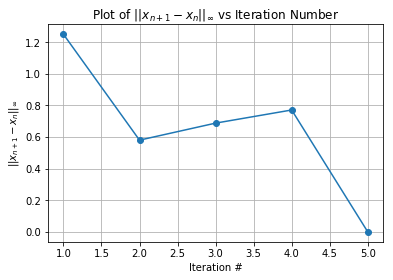

In [12]:
iteration = range(1,len(norm)+1)
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(iteration,norm,'-o');
plt.xlabel('Iteration #')
plt.ylabel(r'$|| x_{n+1} - x_{n} ||_{\infty}$')
plt.title(r'Plot of $|| x_{n+1} - x_{n} ||_{\infty}$ vs Iteration Number')
plt.grid()
norm

In [13]:
import pandas as pd
pd.set_option('max_colwidth', -1)
df = pd.DataFrame(list(zip(norm, x)), index =[*range(1, len(norm)+1)], 
                  columns =['Error Norm','Approximate Solution'])
df.index.names = ['Iteration #']
df

,Error Norm,Approximate Solution
Iteration #,,
1,1.250768e+00,"[1.0, 1.0, 1.0, 1.0]"
2,5.807252e-01,"[0.95418747056123, 0.8713196650650056, 0.5747666453731416, -0.25076753662899853]"
3,6.883816e-01,"[1.028633522902516, 0.979084397509264, -0.005958541922851501, -0.06090805461860918]"
4,7.714708e-01,"[0.5864227801183595, 0.290702834317475, 0.05422904495781623, 0.0035735456405526222]"
5,3.358791e-09,"[-0.18504801170969298, 0.9881371092768441, 0.026613943635674524, -0.03009627722800346]"


* Conjugate Gradient Method takes 5 iterations to converge for the given system of equations.
* The error norm is not consistently decreasing. At the 5th iteration, the error norm is close to 0 and meets the convergence criteria.

$\pagebreak$

# Problem 2

## a)

In [14]:
import numpy as np

A = np.array([[-78.8,48.8,0,0,0,0],
              [30,-78.8,48.8,0,0,0],
              [0,30,-78.8,48.8,0,0],
              [0,0,30,-78.8,48.8,0],
              [0,0,0,30,-78.8,48.8],
              [0,0,0,0,30,-78.8]], float)

A

array([[-78.8,  48.8,   0. ,   0. ,   0. ,   0. ],
       [ 30. , -78.8,  48.8,   0. ,   0. ,   0. ],
       [  0. ,  30. , -78.8,  48.8,   0. ,   0. ],
       [  0. ,   0. ,  30. , -78.8,  48.8,   0. ],
       [  0. ,   0. ,   0. ,  30. , -78.8,  48.8],
       [  0. ,   0. ,   0. ,   0. ,  30. , -78.8]])

In [15]:
b = np.array([-1.04,0,0,0,0,-10.01],float)
b

array([ -1.04,   0.  ,   0.  ,   0.  ,   0.  , -10.01])

In [16]:
# Solution Using Numpy Library for Verification
np.linalg.solve(A, b)

array([0.10258806, 0.14434301, 0.17001204, 0.18579218, 0.19549309,
       0.20145676])

### Function to iteratively solve Ax = b for x, with Gauss-Seidel method

In [17]:
# Reset Formatter
#np.set_printoptions()

# Gauss Seidel Function

def gauss_seidel(A, b, min_tol=1e-4, max_tol = 1e4, iter_max=100):
    norm = []
    x = []
    L = len(b)

    xn = np.zeros(L)
    x0 = np.zeros(L)
    print('x0: ',x0)
    print()

    for itr in range(1,iter_max+1):
        print(f'Iteration #: {itr}')
        for i in range(0,L):
            xn[i] = b[i]/A[i,i]
            for j in range(0,L): 
                if (j<i):
                    xn[i] =  xn[i]-(A[i,j]*xn[j])/A[i,i]
                if (j>i):
                    xn[i] =  xn[i]-(A[i,j]*x0[j])/A[i,i]
        print('Approximated Solution: ', xn)
        x.append(xn)
    
        #Stop condition 
        stop = np.linalg.norm(xn - x0, ord=np.inf)
        norm.append(stop)
        print(f'Norm: {stop:.5f}')
        print()
        
        if stop <= min_tol:
            print('Solution Converged!')
            print('Best Approximated Solution: ')
            break
        elif stop >= max_tol:
            print('Solution Diverged!')
            print('Latest Approximated Solution: ')
            break
    
        x0 = xn
        xn = np.zeros(L)
        
    return xn, norm, x

ans, error, x = gauss_seidel(A, b)
print(ans)

x0:  [0. 0. 0. 0. 0. 0.]

Iteration #: 1
Approximated Solution:  [0.01319797 0.00502461 0.00191292 0.00072827 0.00027726 0.12713601]
Norm: 0.12714

Iteration #: 2
Approximated Solution:  [0.01630966 0.00739391 0.00326595 0.00141509 0.07927272 0.15721042]
Norm: 0.07900

Iteration #: 3
Approximated Solution:  [0.01777694 0.00879044 0.00422296 0.05070047 0.11666095 0.17144452]
Norm: 0.04929

Iteration #: 4
Approximated Solution:  [0.01864179 0.00971237 0.03509586 0.08560825 0.13876574 0.17986005]
Norm: 0.03491

Iteration #: 5
Approximated Solution:  [0.01921273 0.02904899 0.06407554 0.11033038 0.15338937 0.18542742]
Norm: 0.02898

Iteration #: 6
Approximated Solution:  [0.0311877  0.05155479 0.08795389 0.12847738 0.16374594 0.18937028]
Norm: 0.02388

Iteration #: 7
Approximated Solution:  [0.0451253  0.07164859 0.10684205 0.14208202 0.17136714 0.19227175]
Norm: 0.02009

Iteration #: 8
Approximated Solution:  [0.05756918 0.08808334 0.12152415 0.15239138 0.17708887 0.19445008]
Norm: 0.01643

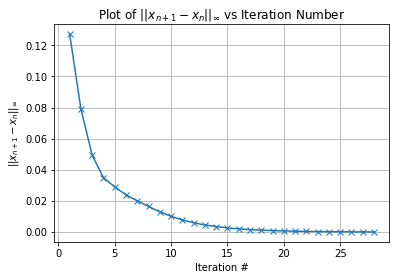

In [18]:
iteration = range(1,len(error)+1)
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(iteration,error, '-x');
plt.xlabel('Iteration #')
plt.ylabel(r'$|| x_{n+1} - x_{n} ||_{\infty}$')
plt.title(r'Plot of $|| x_{n+1} - x_{n} ||_{\infty}$ vs Iteration Number')
plt.grid()

In [19]:
import pandas as pd
pd.set_option('max_colwidth', -1)
df = pd.DataFrame(list(zip(error, x)), index =[*range(1, len(error)+1)], 
                  columns =['Error Norm','Approximate Solution'])
df.index.names = ['Iteration #']
df

,Error Norm,Approximate Solution
Iteration #,,
1,0.127136,"[0.01319796954314721, 0.005024607694091578, 0.0019129217109485703, 0.0007282696869093543, 0.00027726003308731765, 0.12713601270295202]"
2,0.078995,"[0.01630965552629022, 0.007393911742170011, 0.0032659506724146805, 0.0014150864186180396, 0.07927271589419542, 0.15721042483281553]"
3,0.049285,"[0.017776940266724578, 0.008790439096644335, 0.004222961803653431, 0.05070047448916674, 0.11666095135173096, 0.1714445246262935]"
4,0.034908,"[0.018641794770510707, 0.009712365217431584, 0.03509586436033356, 0.08560825325855936, 0.13876574111065867, 0.179860053722332]"
5,0.028980,"[0.019212733789475397, 0.029048987239448473, 0.06407553776905014, 0.11033038450852345, 0.1533893674734201, 0.18542742416500765]"
6,0.023878,"[0.031187697681282815, 0.05155478646660065, 0.08795388779205539, 0.12847738282315435, 0.16374593634450513, 0.18937028033420247]"
7,0.020094,"[0.045125299233123244, 0.07164858757926397, 0.1068420546846174, 0.14208202200698442, 0.17136713630099765, 0.19227175239885697]"
8,0.016435,"[0.05756917606431576, 0.0880833445499848, 0.12152414987868507, 0.15239138004884817, 0.17708886952448813, 0.19445007723013508]"
9,0.012967,"[0.06774704586344237, 0.10105063312161297, 0.13284541040649975, 0.16024491300748747, 0.18142780658699514, 0.19610195682246007]"


* Gauss Seidel method takes 28 iterations to converge for the given system of equations.
* Error norm is consistently decreasing and at iteration 28 meets the convergence criteria.

$\pagebreak$

## b)

In [20]:
A,b

(array([[-78.8,  48.8,   0. ,   0. ,   0. ,   0. ],
        [ 30. , -78.8,  48.8,   0. ,   0. ,   0. ],
        [  0. ,  30. , -78.8,  48.8,   0. ,   0. ],
        [  0. ,   0. ,  30. , -78.8,  48.8,   0. ],
        [  0. ,   0. ,   0. ,  30. , -78.8,  48.8],
        [  0. ,   0. ,   0. ,   0. ,  30. , -78.8]]),
 array([ -1.04,   0.  ,   0.  ,   0.  ,   0.  , -10.01]))

### Function to iteratively solve Ax = b for x, with Jacobi method in double precision

In [21]:
# Print upto 5 decimal places
#np.set_printoptions(precision=5)

def jacobi_method(A, b, min_tol=1e-4, max_tol = 1e4, iter_max=100):
    
    norm = [] # List to store norm values
    x = []
    L = len(b)
    xn = np.zeros(L) # Initialize approximated solution

    x0 = np.ones(L) # Initialize first approximation with vector 1
    print('x0: ',x0)
    print()

    for itr in range(1,iter_max+1): # Start Loop
        print(f'Iteration #: {itr}')
        for i in range(0,L):
            xn[i] = b[i]/A[i,i]
            for j in range(0,L): 
                if (i != j):
                    xn[i] =  xn[i]-(A[i,j]*x0[j])/A[i,i]
        
        print('Approximated Solution: ', xn)
        x.append(xn)
    
        #Stop condition 
        stop = np.linalg.norm(xn - x0, ord=np.inf)
        norm.append(stop)
        print(f'Error Norm: {stop:.5f}')
        print()
        
        if stop <= min_tol:
            print()
            print('Solution Converged!')
            print('Best Approximated Solution: ')
            #print(xn)
            break
        elif stop >= max_tol:
            print()
            print('Solution Diverged!')
            print('Latest Approximated Solution: ')
            #print(xn)
            break
    
        x0 = xn
        xn = np.zeros([L])
    
    return xn, norm, x

ans, error, approx = jacobi_method(A, b)
print(ans)

# Reset Formatter
#np.set_printoptions()

x0:  [1. 1. 1. 1. 1. 1.]

Iteration #: 1
Approximated Solution:  [0.63248731 1.         1.         1.         1.         0.50774112]
Error Norm: 0.49226

Iteration #: 2
Approximated Solution:  [0.63248731 0.860084   1.         1.         0.69514932 0.50774112]
Error Norm: 0.30485

Iteration #: 3
Approximated Solution:  [0.54583882 0.860084   0.94673249 0.81120922 0.69514932 0.39168121]
Error Norm: 0.18879

Iteration #: 4
Approximated Solution:  [0.54583882 0.794108   0.82981637 0.79092971 0.5514     0.39168121]
Error Norm: 0.14375

Iteration #: 5
Approximated Solution:  [0.50498059 0.72170309 0.79213972 0.65739608 0.54367937 0.33695431]
Error Norm: 0.13353

Iteration #: 6
Approximated Solution:  [0.460141   0.68281518 0.68187845 0.63827088 0.45894991 0.33401499]
Error Norm: 0.11026

Iteration #: 7
Approximated Solution:  [0.43605813 0.59746064 0.65522937 0.54382118 0.44984845 0.30175758]
Error Norm: 0.09445

Iteration #: 8
Approximated Solution:  [0.38319897 0.57178854 0.56424229 0.528

In [22]:
import pandas as pd
pd.set_option('max_colwidth', -1)
df = pd.DataFrame(list(zip(np.around(error,5), np.around(approx,5))), 
                  index =[*range(1, len(error)+1)], 
                  columns =['Error Norm','Approximate Solution'])
df.index.names = ['Iteration #']
#df.round(5)
#pd.set_option('display.float_format', '{:.5f}'.format)
df

,Error Norm,Approximate Solution
Iteration #,,
1,0.49226,"[0.63249, 1.0, 1.0, 1.0, 1.0, 0.50774]"
2,0.30485,"[0.63249, 0.86008, 1.0, 1.0, 0.69515, 0.50774]"
3,0.18879,"[0.54584, 0.86008, 0.94673, 0.81121, 0.69515, 0.39168]"
4,0.14375,"[0.54584, 0.79411, 0.82982, 0.79093, 0.5514, 0.39168]"
5,0.13353,"[0.50498, 0.7217, 0.79214, 0.6574, 0.54368, 0.33695]"
6,0.11026,"[0.46014, 0.68282, 0.68188, 0.63827, 0.45895, 0.33401]"
7,0.09445,"[0.43606, 0.59746, 0.65523, 0.54382, 0.44985, 0.30176]"
8,0.09099,"[0.3832, 0.57179, 0.56424, 0.52804, 0.39391, 0.29829]"
9,0.07647,"[0.3673, 0.49532, 0.5447, 0.45876, 0.38576, 0.277]"


* Jacobi method takes 60 iterations to converge for the given system of equations.
* It is higher than the number of iterations taken for Gauss Seidel method.
* Error norm is consistently decreasing but the rate is slower than Gauss Seidel.

$\pagebreak$

# Problem 3

## a)

In [23]:
import numpy as np

A = np.array([[7,-3,0,0,0],
              [-3,9,2,0,0],
              [0,1,3,-1,0],
              [0,0,-1,10,-4],
              [0,0,0,-4,6]], float)
A

array([[ 7., -3.,  0.,  0.,  0.],
       [-3.,  9.,  2.,  0.,  0.],
       [ 0.,  1.,  3., -1.,  0.],
       [ 0.,  0., -1., 10., -4.],
       [ 0.,  0.,  0., -4.,  6.]])

In [24]:
b = np.array([8,-12,5,14,5],float)
b

array([  8., -12.,   5.,  14.,   5.])

In [25]:
# Check the solution using library for verification
np.linalg.solve(A,b)

array([ 0.30510666, -1.95475113,  3.25404008,  2.8073691 ,  2.70491273])

### Function to iteratively solve Ax = b for x, with SOR (successive over-relaxation) method.

In [26]:
def sor_method(A, b, min_tol=1e-4, max_tol = 1e4, iter_max=100, omega=1):
    norm = []
    x = []
    iteration = []
    L = len(b)

    xn = np.zeros(L)
    x0 = np.zeros(L)
    print('x0: ',x0)
    print()

    for itr in range(1,iter_max+1):
        print(f'Iteration #: {itr}')
        for i in range(0,L):
            xn[i] = (1-w)*x0[i] + (w*b[i])/A[i,i]
            for j in range(0,L): 
                if (j<i):
                    xn[i] =  xn[i]-(A[i,j]*xn[j])*(w/A[i,i])
                if (j>i):
                    xn[i] =  xn[i]-(A[i,j]*x0[j])*(w/A[i,i])
        print('Approximated Solution: ', xn)
        x.append(xn)
    
        #Stop condition 
        stop = np.linalg.norm(xn - x0, ord=np.inf)
        norm.append(stop)
        print(f'Norm: {stop}')
        print()
        
        if stop <= min_tol:
            print('Solution Converged!')
            print('Best Approximated Solution: ')
            iteration.append(itr)
            break
        elif stop >= max_tol:
            print('Solution Diverged!')
            print('Latest Approximated Solution: ')
            iteration.append(itr)
            break
    
        x0 = xn
        xn = np.zeros(L)
    
    if itr>=iter_max:
        print('Number of Iterations Exceeded. Solution did not converge!')
        print('Latest Approximated Solution: ')
        iteration.append(itr)
        
    return xn, norm, x, iteration

solution = []
iteration = []

for w in np.arange(1.1,2,0.1):
    print(f'Relaxation Parameter: {w}')
    ans, error, x, itr = sor_method(A, b, iter_max=50, omega = w)
    iteration.append(itr[-1])
    solution.append(x[-1])
    print(x[-1])
    print()
    print('######################################################################################')

Relaxation Parameter: 1.1
x0:  [0. 0. 0. 0. 0.]

Iteration #: 1
Approximated Solution:  [ 1.25714286 -1.00571429  2.20209524  1.78223048  2.22363568]
Norm: 2.223635682539683

Iteration #: 2
Approximated Solution:  [ 0.65730612 -1.66337294  2.87651173  2.65659294  2.64247126]
Norm: 0.8743624666868226

Iteration #: 3
Approximated Solution:  [ 0.40725072 -1.85415142  3.19962176  2.78898645  2.69767627]
Norm: 0.323110031870387

Iteration #: 4
Approximated Solution:  [ 0.34231783 -1.93786475  3.24654993  2.80519941  2.70404527]
Norm: 0.08371332906561824

Iteration #: 5
Approximated Solution:  [ 0.30934626 -1.95305432  3.25337137  2.80713083  2.70482475]
Norm: 0.032971566503651295

Iteration #: 6
Approximated Solution:  [ 0.30548262 -1.9546195   3.25397132  2.80734665  2.70490507]
Norm: 0.0038636416469324253

Iteration #: 7
Approximated Solution:  [ 0.30513112 -1.95473852  3.2540341   2.80736732  2.70491219]
Norm: 0.0003515041425992127

Iteration #: 8
Approximated Solution:  [ 0.30511016 -1.

In [27]:
omega = np.arange(1.1,2,0.1)

import pandas as pd
pd.set_option('max_colwidth', -1)
df = pd.DataFrame({r'Relaxation Parameter $(\omega)$':omega, 
                   'Number of Iterations': iteration,
                   'Approximated Solution':solution})
df.reset_index(drop=True)
df

,Relaxation Parameter $(\omega)$,Number of Iterations,Approximated Solution
0,1.1,8,"[0.3051101584565574, -1.954749647146926, 3.2540394768036203, 2.8073689751039046, 2.7049126959266823]"
1,1.2,9,"[0.30507850938951164, -1.9547573752778435, 3.254040121340143, 2.807368031916268, 2.704911840327871]"
2,1.3,12,"[0.30510530015142834, -1.954746906945906, 3.25403534882354, 2.8073676058819794, 2.7049120976861207]"
3,1.4,14,"[0.3050772685540317, -1.9547643352001258, 3.254032928370397, 2.807364847621849, 2.704907045624876]"
4,1.5,17,"[0.3050447298046377, -1.9547491964520671, 3.254029995166847, 2.807351681230508, 2.7048960285247006]"
5,1.6,22,"[0.30509246784167265, -1.9547783799679208, 3.2540529891768797, 2.807408463230333, 2.70491984991053]"
6,1.7,32,"[0.305152867393784, -1.9547736214928872, 3.2540734706730685, 2.8073701404087155, 2.7048948727457005]"
7,1.8,49,"[0.30509828470565314, -1.9547839379131475, 3.2540519561074435, 2.8073178339989635, 2.704897509427579]"
8,1.9,50,"[0.30115430624152917, -1.949829285276604, 3.242244852860898, 2.8197743234793693, 2.718931850341053]"


$\pagebreak$

## b)

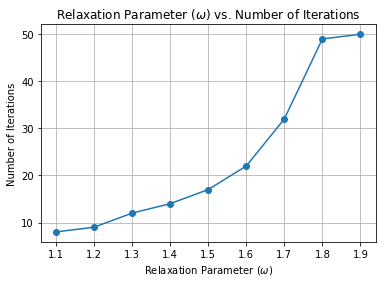

In [28]:
x = np.arange(1.1,2,0.1)
y = iteration

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,y,'-o')
plt.title(r'Relaxation Parameter $(\omega)$ vs. Number of Iterations')
plt.xlabel(r'Relaxation Parameter $(\omega)$')
plt.ylabel('Number of Iterations')
plt.grid()
plt.show()

* As the relaxation number increases the number of iteration also increases.
* For $\omega = 1.9$, the solution does not converge as the error norm is higher than the convergence criteria.

$\pagebreak$

## c)

In [29]:
# Reset Formatter
#np.set_printoptions()

def gauss_seidel(A, b, min_tol=1e-4, max_tol = 1e4, iter_max=100):
    norm = []
    x = []
    L = len(b)

    xn = np.zeros(L)
    x0 = np.zeros(L)
    print('x0: ',x0)
    print()

    for itr in range(1,iter_max+1):
        print(f'Iteration #: {itr}')
        for i in range(0,L):
            xn[i] = b[i]/A[i,i]
            for j in range(0,L): 
                if (j<i):
                    xn[i] =  xn[i]-(A[i,j]*xn[j])/A[i,i]
                if (j>i):
                    xn[i] =  xn[i]-(A[i,j]*x0[j])/A[i,i]
        print('Approximated Solution: ', xn)
        x.append(xn)
    
        #Stop condition 
        stop = np.linalg.norm(xn - x0, ord=np.inf)
        norm.append(stop)
        print(f'Norm: {stop:.5f}')
        print()
        
        if stop <= min_tol:
            print('Solution Converged!')
            print('Best Approximated Solution: ')
            break
        elif stop >= max_tol:
            print('Solution Diverged!')
            print('Latest Approximated Solution: ')
            break
    
        x0 = xn
        xn = np.zeros(L)
        
    return xn, norm, x

ans, error, x = gauss_seidel(A, b, iter_max=50)
print(ans)

x0:  [0. 0. 0. 0. 0.]

Iteration #: 1
Approximated Solution:  [ 1.14285714 -0.95238095  1.98412698  1.5984127   1.8989418 ]
Norm: 1.98413

Iteration #: 2
Approximated Solution:  [ 0.73469388 -1.52935248  2.70925506  2.43050223  2.45366815]
Norm: 0.83209

Iteration #: 3
Approximated Solution:  [ 0.48742036 -1.77291656  3.06780626  2.68824789  2.62549859]
Norm: 0.35855

Iteration #: 4
Approximated Solution:  [ 0.38303576 -1.88738947  3.19187912  2.76938735  2.67959157]
Norm: 0.12407

Iteration #: 5
Approximated Solution:  [ 0.33397594 -1.93131449  3.23356728  2.79519335  2.69679557]
Norm: 0.04906

Iteration #: 6
Approximated Solution:  [ 0.31515093 -1.94685353  3.24734896  2.80345312  2.70230208]
Norm: 0.01883

Iteration #: 7
Approximated Solution:  [ 0.30849134 -1.95213599  3.25186304  2.80610714  2.70407142]
Norm: 0.00666

Iteration #: 8
Approximated Solution:  [ 0.30622743 -1.95389375  3.25333363  2.80696193  2.70464129]
Norm: 0.00226

Iteration #: 9
Approximated Solution:  [ 0.305474

* Gauss Seidel method takes 11 iterations to converge for the given system of equations.
* For 1.1$\leq \omega \leq$1.2, the SOR method performs better than Gauss Seidel, as it takes lesser number of iterations.

In [30]:
import pandas as pd
pd.set_option('max_colwidth', -1)
df = pd.DataFrame(list(zip(error, x)), index =[*range(1, len(error)+1)], columns =['Error Norm','Approximate Solution'])
df.index.names = ['Iteration #']
df

,Error Norm,Approximate Solution
Iteration #,,
1,1.984127,"[1.1428571428571428, -0.9523809523809523, 1.9841269841269842, 1.5984126984126983, 1.8989417989417987]"
2,0.832090,"[0.7346938775510203, -1.529352481733434, 2.709255060048711, 2.4305022255815905, 2.453668150387727]"
3,0.358551,"[0.4874203649713853, -1.772916558353696, 3.0678062613117625, 2.688247886286267, 2.6254985908575112]"
4,0.124073,"[0.3830357607055588, -1.8873894711674275, 3.1918791191512317, 2.7693873482581277, 2.6795915655054183]"
5,0.049060,"[0.33397594092824534, -1.9313144906130806, 3.233567279623736, 2.7951933541645406, 2.6967955694430272]"
6,0.018825,"[0.315150932594394, -1.9468535290515878, 3.247348961072043, 2.803453123884415, 2.70230208258961]"
7,0.006660,"[0.30849134469217654, -1.9521359875630617, 3.251863037149159, 2.80610713675076, 2.7040714245005066]"
8,0.002264,"[0.30622743390154494, -1.9538937525104092, 3.2533336297537234, 2.806961932775575, 2.70464128851705]"
9,0.000753,"[0.30547410606696745, -1.9544716601451717, 3.253811197640249, 2.8072376351708446, 2.7048250901138964]"
